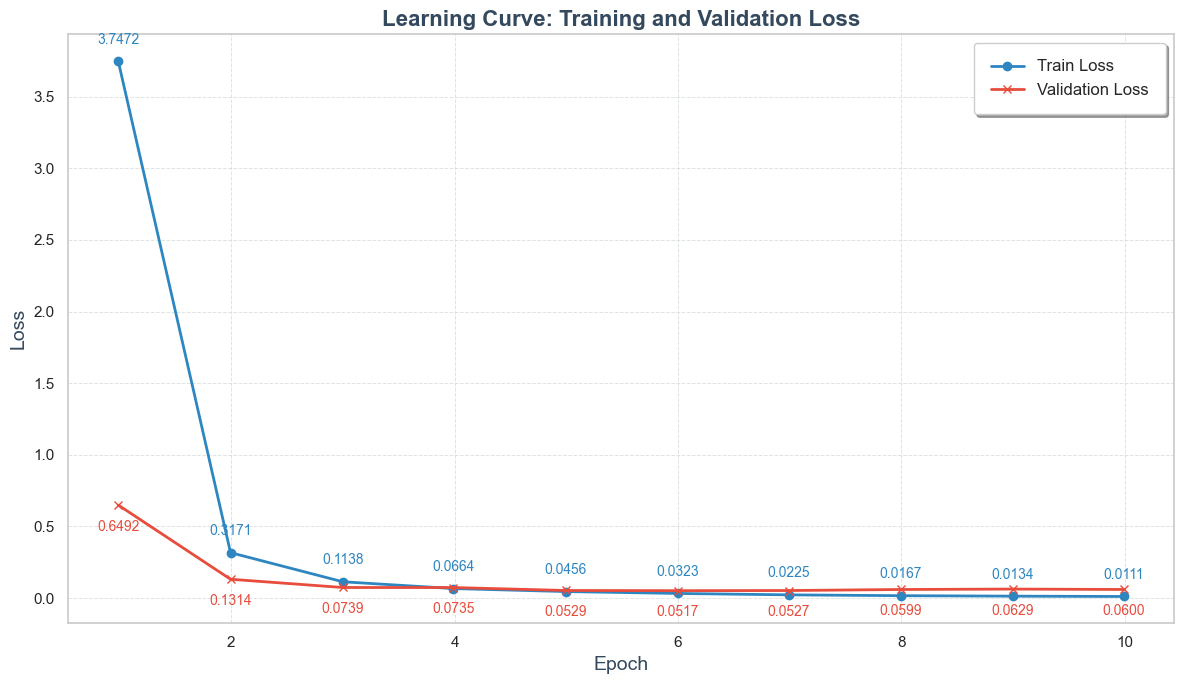

In [20]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load trainer_state.json
with open('../Source_Fine-Tuning/results/bert_question_answer/checkpoint-676/trainer_state.json', 'r') as f:
    trainer_state = json.load(f)

# Extract Loss and Metrics
log_history = trainer_state['log_history']  # Log history là danh sách các từ điển

# Separate train and validation losses
train_epochs = []
train_loss_values = []
val_epochs = []
val_loss_values = []

# Đọc qua từng log và phân tách loss cho train và validation
for log in log_history:
    if 'loss' in log and 'epoch' in log:
        # Train loss
        train_epochs.append(log['epoch'])
        train_loss_values.append(log['loss'])
    
    if 'eval_loss' in log:
        # Validation loss (eval_loss)
        val_epochs.append(log['epoch'])  # Dùng epoch cho validation loss
        val_loss_values.append(log['eval_loss'])

# Set Seaborn style for enhanced visuals
sns.set_theme(style="whitegrid")

# Create figure and plot lines
plt.figure(figsize=(12, 7))

# Vẽ đường cho Train Loss
plt.plot(train_epochs, train_loss_values, label='Train Loss', marker='o', color='#2E86C1', linewidth=2)

# Vẽ đường cho Validation Loss
plt.plot(val_epochs, val_loss_values, label='Validation Loss', marker='x', color='#E74C3C', linewidth=2)

# Thêm giá trị loss cho từng epoch với offset
for i in range(len(train_epochs)):
    # Tăng khoảng cách lên trên cho nhãn
    plt.text(train_epochs[i], train_loss_values[i] + 0.2, f'{train_loss_values[i]:.4f}', 
             fontsize=10, color='#2E86C1', ha='center', va='top')  # Đẩy nhãn lên trên 0.1

for i in range(len(val_epochs)):
    # Tăng khoảng cách lên trên cho nhãn
    plt.text(val_epochs[i], val_loss_values[i] -0.2, f'{val_loss_values[i]:.4f}', 
             fontsize=10, color='#E74C3C', ha='center', va='bottom')  # Đẩy nhãn lên trên 0.1

# Tiêu đề và nhãn trục
plt.title('Learning Curve: Training and Validation Loss', fontsize=16, fontweight='bold', color='#34495E')
plt.xlabel('Epoch', fontsize=14, color='#34495E')
plt.ylabel('Loss', fontsize=14, color='#34495E')
plt.legend(fontsize=12, loc='upper right', frameon=True, shadow=True, borderpad=1)
plt.grid(color='#D5DBDB', linestyle='--', linewidth=0.7, alpha=0.8)

plt.tight_layout()
plt.show()


# Bảng kết quả

| Thông số                       | Giá trị                   |
|---------------------------------|---------------------------|
| **Bước huấn luyện (Step)**      | 21                        |
| **Mẫu mỗi giây (test/samples_per_second)** | 56.728                   |
| **Mất mát huấn luyện (train/loss)**   | 0.0111                    |
| **Bước mỗi giây (test/steps_per_second)** | 0.897                   |
| **Thời gian đánh giá (eval/runtime)** | 58.7429 giây (0.978 phút) |
| **Học suất (train/learning_rate)** | 7.27876e-06               |
| **Số epoch (train/epoch)**       | 9.99                      |
| **Bước toàn cầu (train/global_step)** | 676                      |
| **Thời gian kiểm tra (test/runtime)** | 57.9785 giây (0.966 phút) |
| **Mẫu mỗi giây đánh giá (eval/samples_per_second)** | 57.386                   |
| **Mất mát đánh giá (eval/loss)** | 0.05999                   |
| **Số bước huấn luyện mỗi giây (train_steps_per_second)** | 0.072                     |
| **Bước mỗi giây đánh giá (eval/steps_per_second)** | 0.902                   |
| **Mẫu mỗi giây huấn luyện (train_samples_per_second)** | 27.949                   |
| **Mất mát huấn luyện (train_loss)** | 0.4355                   |
| **Thời gian huấn luyện (train_runtime)** | 13938.5865 giây (232.31 phút) |
| **Thời gian tổng cộng (wandb/runtime)** | 14128 giây (235.47 phút)  |
| **Thời gian chạy (runtime)**      | 13998.1911 giây (233.30 phút) |
| **Độ lớn gradient (train/grad_norm)** | 58431.6328125            |
| **Total FLOPS (total_flos)**      | 6.7861e+16                |


In [23]:
import matplotlib.pyplot as plt

# Thông tin từ file JSON
gpu_names = ['Tesla T4 (1)', 'Tesla T4 (2)']
memory_total = [16106127360, 16106127360]  # Tổng bộ nhớ của mỗi GPU (bytes)
memory_used = [6372215218176, 6372215218176]  # Giả sử giá trị đã sử dụng là giống nhau
cuda_cores = [2560, 2560]

# Chuyển bộ nhớ từ bytes sang GB
memory_used_gb = [mu / (1024**3) for mu in memory_used]  # Bộ nhớ đã sử dụng (GB)
memory_total_gb = [mt / (1024**3) for mt in memory_total]  # Bộ nhớ tổng cộng (GB)
memory_free_gb = [mt - mu for mt, mu in zip(memory_total, memory_used)]
memory_free_gb = [mf / (1024**3) for mf in memory_free_gb]  # Bộ nhớ còn lại (GB)



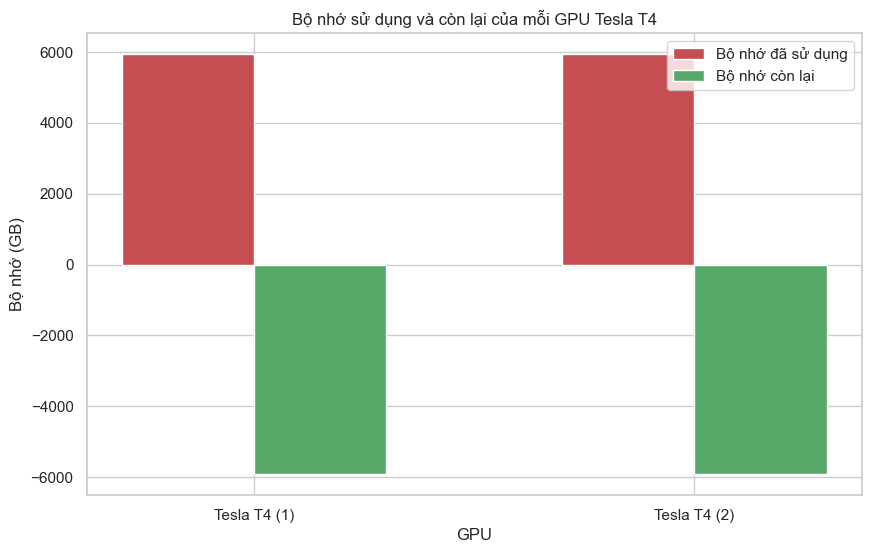

In [24]:

# 1. Biểu đồ phân phối bộ nhớ (tổng và đã sử dụng)
plt.figure(figsize=(10, 6))
bar_width = 0.3
x = range(len(gpu_names))

plt.bar(x, memory_used_gb, width=bar_width, label='Bộ nhớ đã sử dụng', color='r', align='center')
plt.bar([p + bar_width for p in x], memory_free_gb, width=bar_width, label='Bộ nhớ còn lại', color='g', align='center')

plt.xlabel('GPU')
plt.ylabel('Bộ nhớ (GB)')
plt.title('Bộ nhớ sử dụng và còn lại của mỗi GPU Tesla T4')
plt.xticks([p + bar_width/2 for p in x], gpu_names)
plt.legend()
plt.show()

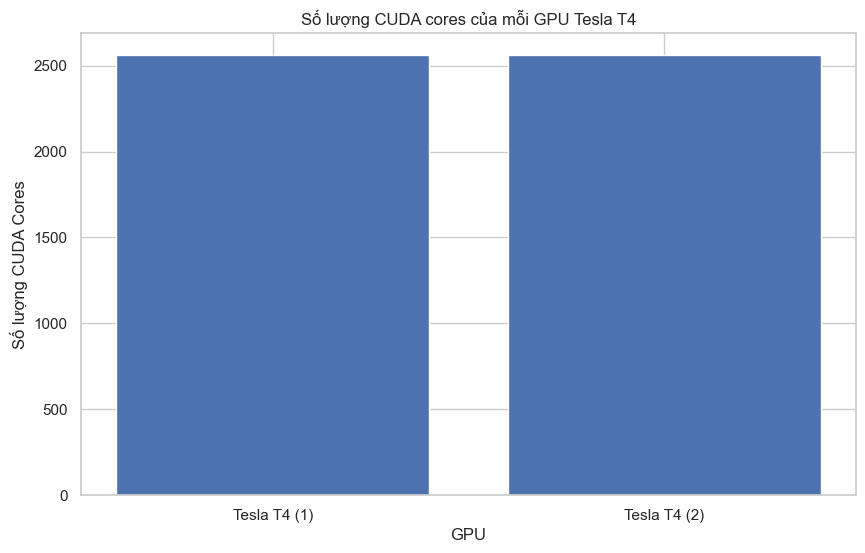

In [25]:
# 2. Biểu đồ số lượng CUDA cores của mỗi GPU
plt.figure(figsize=(10, 6))
plt.bar(gpu_names, cuda_cores, color='b')
plt.xlabel('GPU')
plt.ylabel('Số lượng CUDA Cores')
plt.title('Số lượng CUDA cores của mỗi GPU Tesla T4')
plt.show()


In [29]:
import torch

# Đọc file nhị phân
training_args_bin = torch.load('./results/bert_question_answer/checkpoint-676/training_args.bin')

# In các tham số huấn luyện (đây có thể là một dictionary hoặc cấu trúc khác)
print(training_args_bin)


TrainingArguments(
_n_gpu=2,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval_use_gather_object=False,
evaluation_s

C:\Users\hdang\AppData\Local\Temp\ipykernel_11504\1500663423.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  training_args_bin = torch.load('./results/bert_question_answ